In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df1 = df.reset_index()['Close']
df1.shape

(2035,)

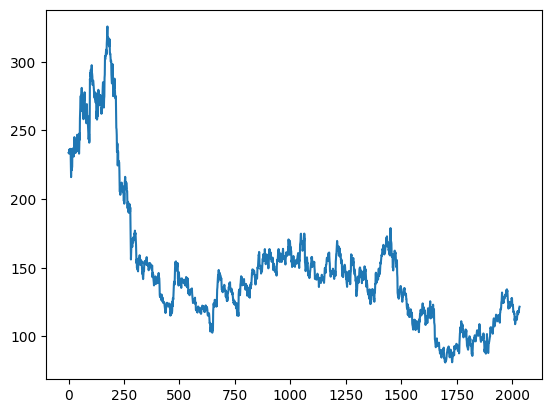

In [4]:
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1.shape

(2035, 1)

In [7]:
##splitting dataset into test and train split
trainingsize = int(len(df1)*0.8)
testsize = int(len(df1)) - trainingsize
traindata, testdata = df1[0:trainingsize,:],df1[trainingsize:len(df1),:1]

In [8]:
import string
def create_sequences(dataset, timestep=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-timestep):
    dataX.append(dataset[i:i+timestep])
    dataY.append(dataset[i+timestep])
  return numpy.array(dataX), numpy.array(dataY)

In [9]:
timestep = 100
xtrain, ytrain = create_sequences(traindata, timestep)
xtest, ytest = create_sequences(testdata, timestep)

In [10]:
print(xtrain.shape), print(ytrain.shape)

(1528, 100, 1)
(1528, 1)


(None, None)

In [11]:
print(xtest.shape), print(ytest.shape)

(307, 100, 1)
(307, 1)


(None, None)

In [12]:
##xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
##xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
24/24 [==============================] - 14s 317ms/step - loss: 0.0220 - val_loss: 0.0060
Epoch 2/100
24/24 [==============================] - 5s 200ms/step - loss: 0.0024 - val_loss: 5.5530e-04
Epoch 3/100
24/24 [==============================] - 5s 199ms/step - loss: 0.0014 - val_loss: 7.4845e-04
Epoch 4/100
24/24 [==============================] - 6s 257ms/step - loss: 0.0013 - val_loss: 8.5600e-04
Epoch 5/100
24/24 [==============================] - 5s 204ms/step - loss: 0.0012 - val_loss: 6.9588e-04
Epoch 6/100
24/24 [==============================] - 6s 256ms/step - loss: 0.0012 - val_loss: 8.0651e-04
Epoch 7/100
24/24 [==============================] - 5s 200ms/step - loss: 0.0011 - val_loss: 5.6841e-04
Epoch 8/100
24/24 [==============================] - 7s 315ms/step - loss: 0.0011 - val_loss: 5.8023e-04
Epoch 9/100
24/24 [==============================] - 5s 201ms/step - loss: 9.6687e-04 - val_loss: 4.4755e-04
Epoch 10/100
24/24 [==============================] - 

In [16]:
trainpredict = model.predict(xtrain)
testpredict = model.predict(xtest)

10/10 [==============================] - 0s 42ms/step


In [17]:
trainpredict = scaler.inverse_transform(trainpredict)
testpredict = scaler.inverse_transform(testpredict)

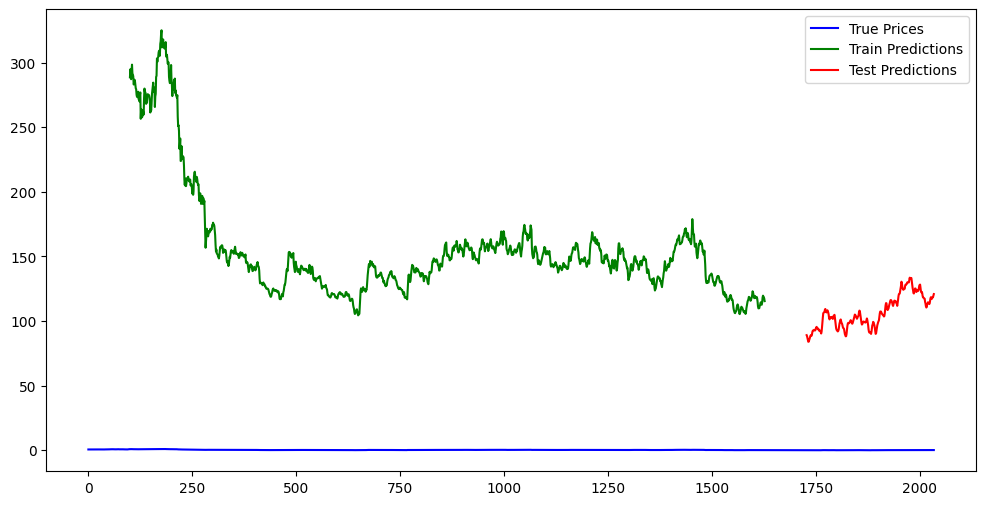

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df1, label='True Prices', color='blue')
plt.plot(range(timestep, trainingsize), trainpredict, label='Train Predictions', color='green')
plt.plot(range(trainingsize + timestep, len(df1)), testpredict, label='Test Predictions', color='red')
plt.legend()
plt.show()